1. Class Boundaries and Posterior Probabilities

![alt text](image.png)

Plot contours on the likelihoods of the two classes, a scatter of 200 data sampled from each of the classes and contours on the posterior probability of one of the classes.

In [1]:
# Importing libraries required
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    return num / den

def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

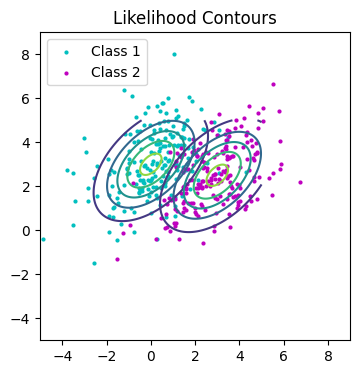

In [3]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]]) # Same covariance matrices

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A1 = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A1.T + m1
U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A1.T + m2

nx = 200
ny = 200

Xa, Ya, Za = twoDGaussianPlot(nx, ny, m1, C)
Xb, Yb, Zb = twoDGaussianPlot(nx, ny, m2, C)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4, label='Class 1')
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4, label='Class 2')
ax.set_xlim(-5, 9)
ax.set_ylim(-5, 9)
ax.contour(Xa, Ya, Za,5)
ax.contour(Xb, Yb, Zb,5)
ax.set_title('Likelihood Contours')
ax.legend()


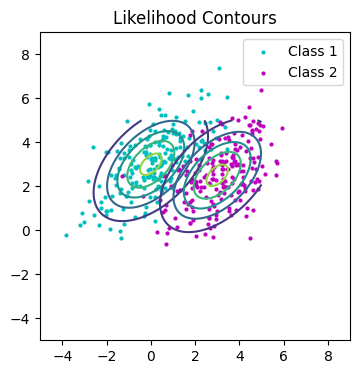

In [4]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]]) # Same covariance matrices

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A1 = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A1.T + m1
U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A1.T + m2

nx = 200
ny = 200

Xa, Ya, Za = twoDGaussianPlot(nx, ny, m1, C)
Xb, Yb, Zb = twoDGaussianPlot(nx, ny, m2, C)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4, label='Class 1')
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4, label='Class 2')
ax.set_xlim(-5, 9)
ax.set_ylim(-5, 9)
ax.contour(Xa, Ya, Za,5)
ax.contour(Xb, Yb, Zb,5)
ax.set_title('Likelihood Contours')
ax.legend()

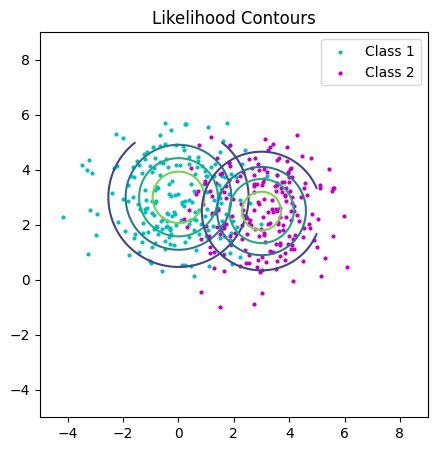

In [5]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 0], [0, 2]], np.float32)
C2 = np.array([[1.5, 0], [0, 1.5]],np.float32)

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A1 = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A1.T + m1
A2 = np.linalg.cholesky(C2)
U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A2.T + m2

nx = 200
ny = 200

Xa, Ya, Za = twoDGaussianPlot(nx, ny, m1, C1)
Xb, Yb, Zb = twoDGaussianPlot(nx, ny, m2, C2)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4, label='Class 1')
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4, label='Class 2')
ax.set_xlim(-5, 9)
ax.set_ylim(-5, 9)
ax.contour(Xa, Ya, Za,5)
ax.contour(Xb, Yb, Zb,5)
ax.set_title('Likelihood Contours')
ax.legend()

In [6]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-6, 6, nx)
    y = np.linspace(-6, 6, ny)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            num = P1 * gauss2D(xvec, m1, C1)
            den = P1 * gauss2D(xvec, m1, C1) + P2 * gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z


Text(0.5, 1.0, 'Posterior Probability Contours')

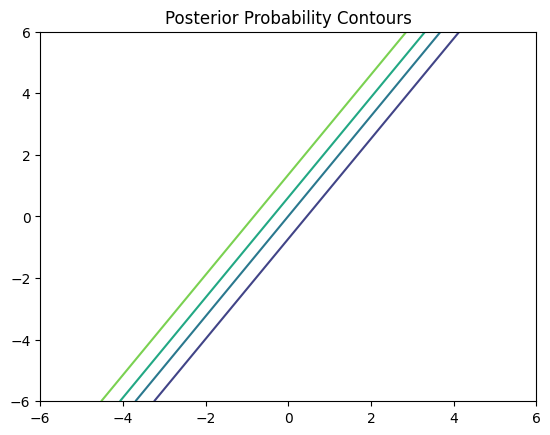

In [7]:

nx = 200
ny = 200
P1 = 0.5  # Prior probability for Class 1
P2 = 0.5  # Prior probability for Class 2

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]])

X, Y, Z = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)

plt.contour(X, Y, Z,5)
plt.title('Posterior Probability Contours')

Text(0.5, 1.0, 'Posterior Probability Contours')

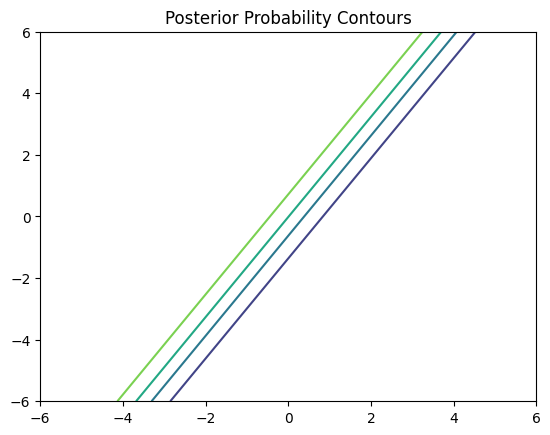

In [8]:
nx = 200
ny = 200
P1 = 0.7  # Prior probability for Class 1
P2 = 0.3  # Prior probability for Class 2

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]])

X, Y, Z = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)

plt.contour(X, Y, Z,5)
plt.title('Posterior Probability Contours')

Text(0.5, 1.0, 'Posterior Probability Contours')

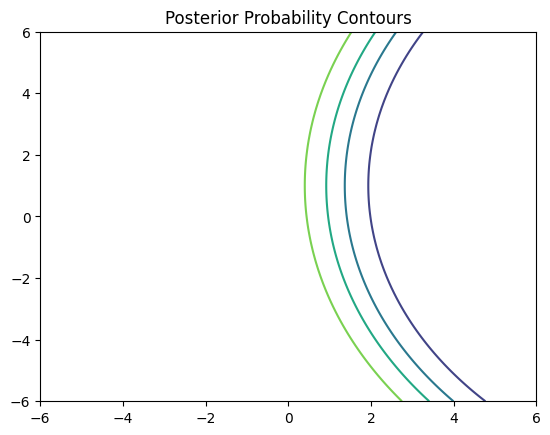

In [9]:
nx = 200
ny = 200
P1 = 0.5  # Prior probability for Class 1
P2 = 0.5  # Prior probability for Class 2

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 0], [0, 2]])
C2 = np.array([[1.5, 0], [0, 1.5]])

X, Y, Z = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)

plt.contour(X, Y, Z,5)
plt.title('Posterior Probability Contours')

2. Fisher LDA and ROC curve

1.Plot contours on the two densities and draw 200 samples from each of the two distributions and plot them on top of the contours.

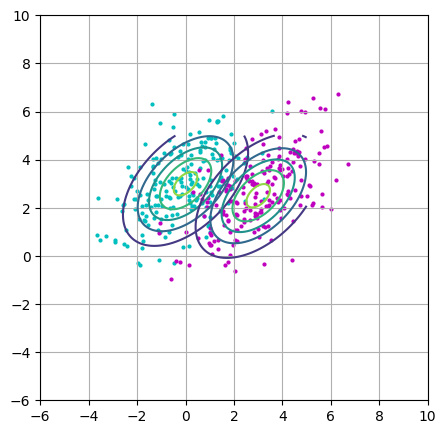

In [28]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]],np.float32)
C2 = np.array([[2, 1], [1, 2]],np.float32)

nx, ny = 200, 200

Xa, Ya, Za = twoDGaussianPlot (nx, ny, m1, C1)
Xb, Yb, Zb = twoDGaussianPlot (nx, ny, m2, C2)

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A2.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)
ax.grid(True)

 3. ComputetheFisher Linear Discriminant direction using the means and covariance matrices of the problem, and plot the discriminant direction: wF = (C1 + C2)−1 (m1 − m2)

uf: [ 1.08333333 -0.66666667]


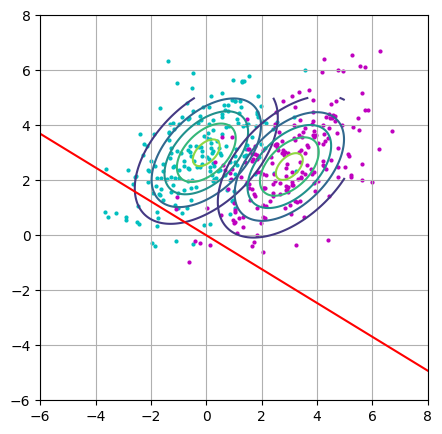

In [33]:
C = np.array([[2, 1], [1, 2]])
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])

Ci = np.linalg.inv(2*C)
uF = Ci @ (m2-m1)
print('uf:',uF)

X_line = np.linspace(-6,8,100)
Y_line = (uF[1] * X_line) / uF[0]


fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.plot(X_line, Y_line, label='Discriminant Direction', color='red')
ax.set_xlim(-6, 8)
ax.set_ylim(-6, 8)
ax.grid(True)



 4. Project the data onto the Fisher discriminant directions and plot histograms of the distribution of projections (an example of this is in Fig. 2(a)

(array([ 1.,  2.,  0.,  2.,  1.,  1.,  1.,  1.,  3.,  8.,  2., 10.,  4.,
         7., 11.,  9., 10., 11., 10.,  6., 11., 15., 12., 12.,  8.,  7.,
         5.,  4.,  8.,  1.,  4.,  2.,  3.,  0.,  2.,  1.,  0.,  3.,  1.,
         1.]),
 array([-2.05743185, -1.87636523, -1.69529861, -1.51423199, -1.33316537,
        -1.15209875, -0.97103214, -0.78996552, -0.6088989 , -0.42783228,
        -0.24676566, -0.06569904,  0.11536758,  0.2964342 ,  0.47750082,
         0.65856744,  0.83963406,  1.02070068,  1.2017673 ,  1.38283392,
         1.56390054,  1.74496716,  1.92603378,  2.1071004 ,  2.28816701,
         2.46923363,  2.65030025,  2.83136687,  3.01243349,  3.19350011,
         3.37456673,  3.55563335,  3.73669997,  3.91776659,  4.09883321,
         4.27989983,  4.46096645,  4.64203307,  4.82309969,  5.00416631,
         5.18523293]),
 <BarContainer object of 40 artists>)

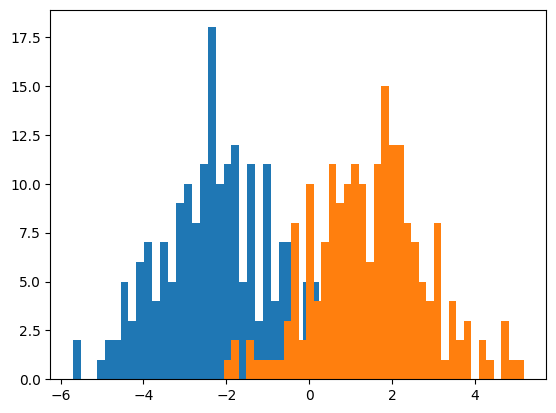

In [30]:
yp1 = X1 @ uF
yp2 = X2 @ uF

plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)

(-6.0, 10.0)

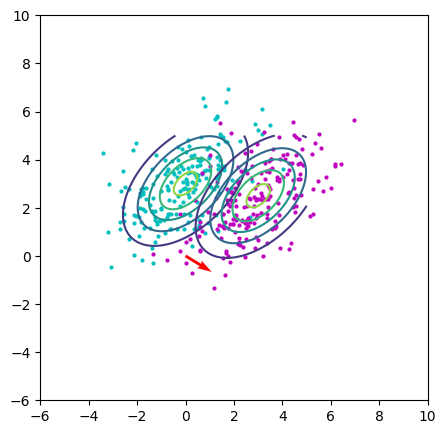

In [12]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])

nx, ny = 200, 200

Xa, Ya, Za = twoDGaussianPlot (nx, ny, m1, C1)
Xb, Yb, Zb = twoDGaussianPlot (nx, ny, m2, C2)

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A2.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 0, uF[0], uF[1], angles='xy', scale_units='xy', scale=1, color='r')
# ax.plot([0, uF[0]],[0, uF[1]])
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

 5. Compute and plot the Receiver Operating Characteristic (ROC) curve, by sliding a decision threshold, and computing the True Positive and False Positive rates (see code snippet in Appendix and example of an ROC curve in Fig. 2(b)).

 7. For a suitable choice of decision threshold, compute the classification accuracy

-6.132646880837238 5.230222792020997

  Threshold    Accuracy
  -1.26285        83.25
  -1.03095        86.25
  -0.799055       89
  -0.56716        90.25
  -0.335264       91.25
  -0.103369       91.75
   0.128526       91.25
   0.360422       90.25
   0.592317       89.5
   0.824212       86.75
   1.05611        83.75
   1.288          80.75


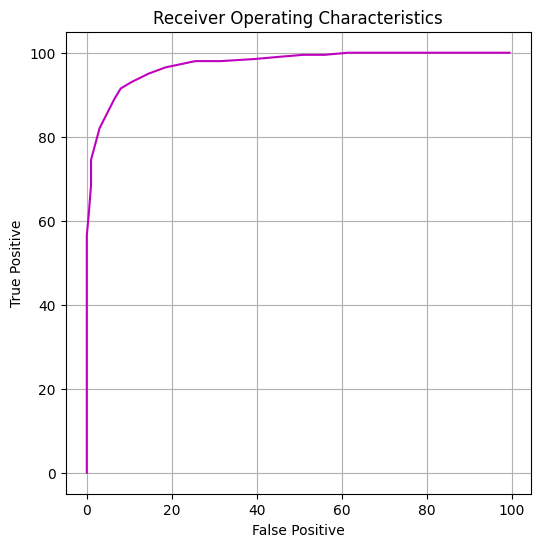

In [13]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
print()
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 3) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  TN = len(yp1[yp1 <= thresh]) * 100 / len(yp1)  # True Negatives
  accuracy = (TP + TN) / 2  # Accuracy
  ROC[i, :] = [TP, FP, accuracy]

# Printing accuracy for each threshold

from tabulate import tabulate

table_data = []
for i in range(50):  
    if ROC[i][2] > 80:
        table_data.append([thRange[i], ROC[i][2]])

print(tabulate(table_data, headers=["Threshold", "Accuracy"], tablefmt="plain"))

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)

 6. Compute the area under the ROC curve (Hint: try numpy.trapz)

In [14]:
print("Fisher discriminant direction:", uF)
area = np.trapz(np.flip(ROC[:,0]), np.flip(ROC[:,1]))
print("Area under the ROC curve:", area)
print("Area under the ROC curve as a percentage:", area/10000,"%")

Fisher discriminant direction: [ 1.08333333 -0.66666667]
Area under the ROC curve: 9682.5
Area under the ROC curve as a percentage: 0.96825 %


Plot the ROC curve (on the same scale) for a random direction (instead of the Fisher discriminant direction).

Random direction :  [0.0013212304695906507, 0.6814234304468108]
AUC for random direction: 3878.25
Area under the ROC curve as a percentage: 0.387825 %


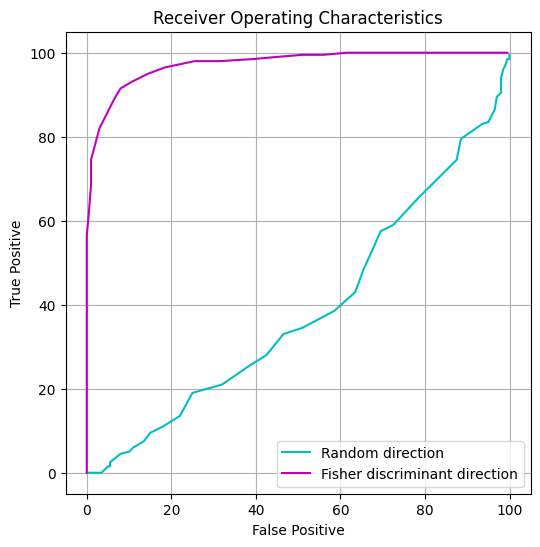

In [15]:
# Define a range over which to slide a threshold
#
uF = [(np.random.random()*2)-1, (np.random.random()*2)-1]
print("Random direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC_New = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC_New[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC_New[:,1], ROC_New[:,0], c='c')
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Random direction", "Fisher discriminant direction"])

area = np.trapz(np.flip(ROC_New[:,0]), np.flip(ROC_New[:,1]))
print("AUC for random direction:", area)
print("Area under the ROC curve as a percentage:", area/10000,"%")

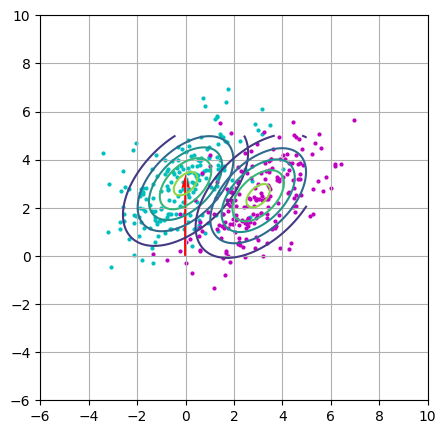

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 0, uF[0], uF[1], angles='xy', scale_units='xy', scale=0.2, color='r')
# ax.plot([0, uF[0]],[0, uF[1]])
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)
ax.grid(True)

Plot the ROC curve (on the same scale) for Projections onto the direction connecting the means of the two classes.

Mean connecting direction :  [3.0, -0.5]
AUC for random direction: 9443.625
Area under the ROC curve as a percentage: 0.9443625 %


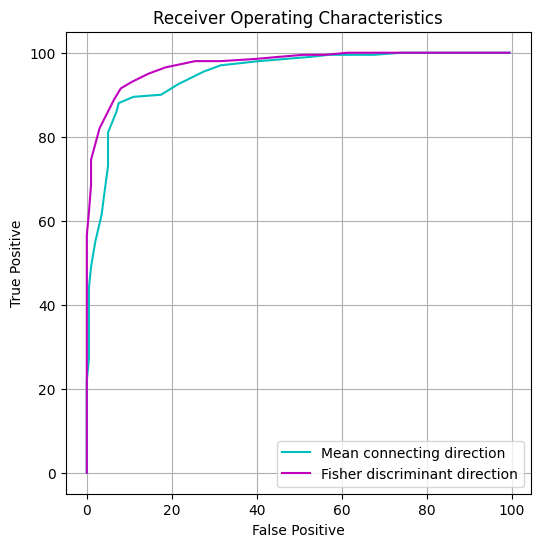

In [17]:
# Define a range over which to slide a threshold
#
uF = [m2[0]-m1[0], m2[1]-m1[1]]
print("Mean connecting direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC_New = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC_New[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC_New[:,1], ROC_New[:,0], c='c')
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Mean connecting direction", "Fisher discriminant direction"])

area = np.trapz(np.flip(ROC_New[:,0]), np.flip(ROC_New[:,1]))
print("AUC for random direction:", area)
print("Area under the ROC curve as a percentage:", area/10000,"%")

(-4.0, 8.0)

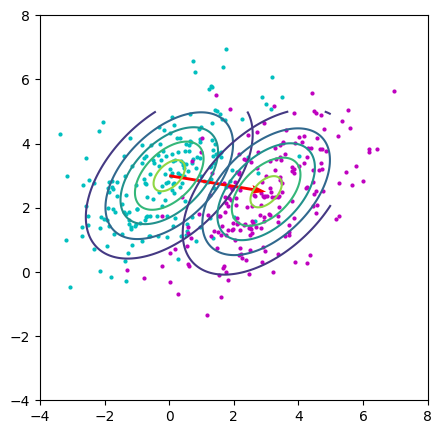

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 3, uF[0], uF[1], angles='xy', scale_units='xy', scale=1, color='r')
# ax.plot([0, uF[0]],[0, uF[1]])
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-4, 8)
ax.set_ylim(-4, 8)

3 Mahalanobis Distance

(-6.0, 10.0)

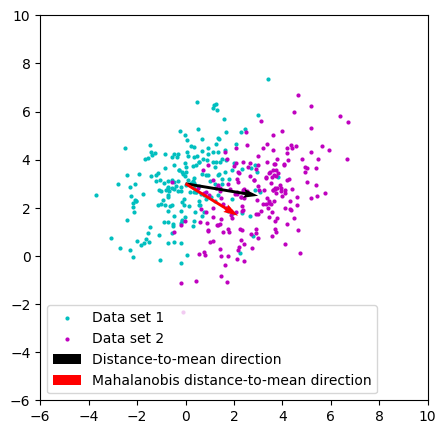

In [19]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]])

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 3, 3.0, -0.5, angles='xy', scale_units='xy', scale=1, color='k') # Distance to Mean direction
ax.quiver(0, 3, 2.16666667, -1.33333333, angles='xy', scale_units='xy', scale=1, color='r') # Mahanolobis distance to Mean direction
ax.legend(["Data set 1", "Data set 2", "Distance-to-mean direction", "Mahalanobis distance-to-mean direction"])
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

Distance-to-mean classifier

Mean connecting direction :  [3.0, -0.5]
AUC for Mean connecting direction: 9313.125
AUC for Mean connecting direction as a percentage: 0.9313125 %


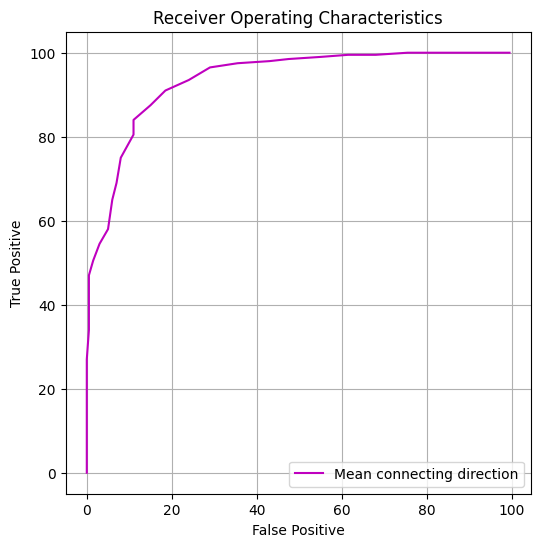

In [20]:
# Define a range over which to slide a threshold
#
uF = [m2[0]-m1[0], m2[1]-m1[1]]
print("Mean connecting direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Mean connecting direction", "Fisher discriminant direction"])

area = np.trapz(np.flip(ROC[:,0]), np.flip(ROC[:,1]))
print("AUC for Mean connecting direction:", area)
print("AUC for Mean connecting direction as a percentage:", area/10000, "%")

In [21]:
def mahalanobis_distance_direction(mean1, mean2, covariance):
    direction = mean2 - mean1

    inv_covariance = np.linalg.inv(covariance)
    mahalanobis_direction = np.dot(inv_covariance, direction)

    return mahalanobis_direction

Mahalanobis Mean connecting direction :  [ 2.16666667 -1.33333333]
AUC for Mahalanobis distance-to-mean direction: 9459.375
AUC for Mahalanobis distance-to-mean direction as a percentage: 0.9459375 %


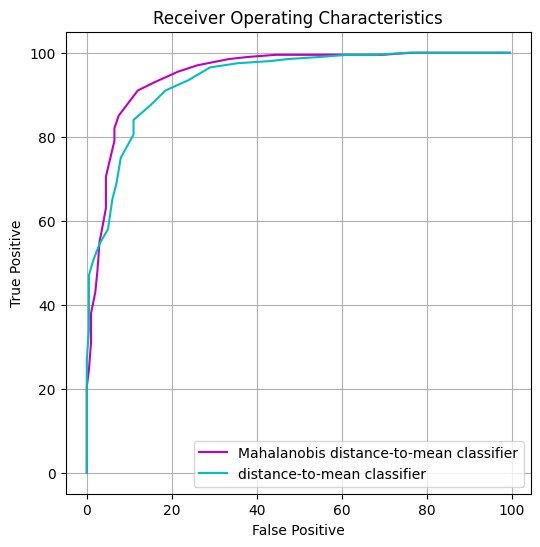

In [22]:
# Define a range over which to slide a threshold
#
uF = mahalanobis_distance_direction(m1, m2, C)
print("Mahalanobis Mean connecting direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC_New = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC_New[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC_New[:,1], ROC_New[:,0], c='m')
ax.plot(ROC[:,1], ROC[:,0], c='c')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Mahalanobis distance-to-mean classifier", "distance-to-mean classifier"])

area = np.trapz(np.flip(ROC_New[:,0]), np.flip(ROC_New[:,1]))
print("AUC for Mahalanobis distance-to-mean direction:", area)
print("AUC for Mahalanobis distance-to-mean direction as a percentage:", area/10000, "%")